In [213]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

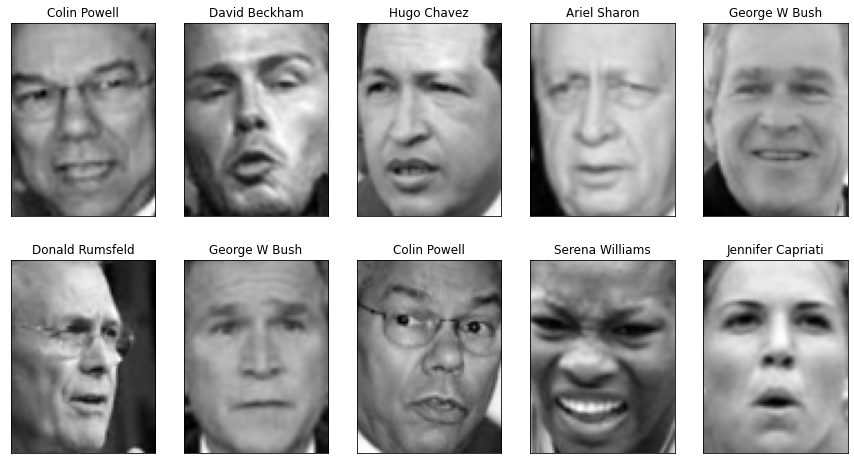

In [214]:
#Show few examples
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
j=1
n = 100
for i in range(n,n+10):
    plt.subplot(2,5,j)
    plt.imshow(people.images[i], cmap="gray")
    plt.title(people.target_names[people.target[i]])
    j=j+1

In [215]:
import numpy as np
#Select at maximum 50 images of each person
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

X_people.shape

(2063, 5655)

In [216]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_people)

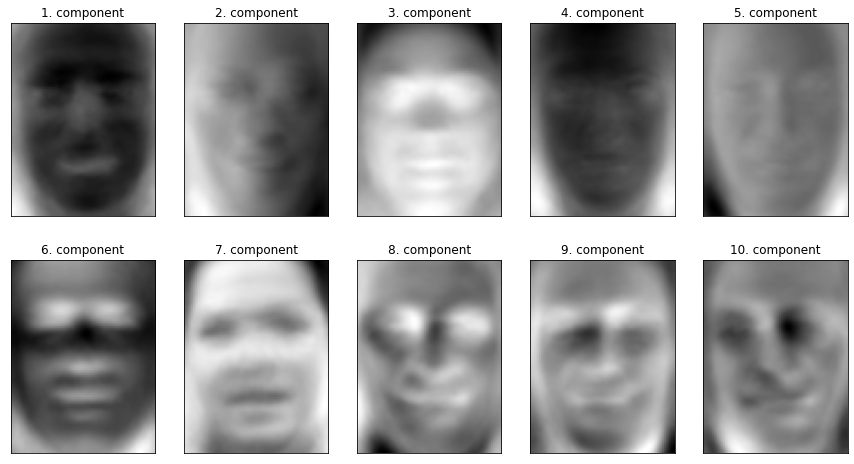

In [217]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
j=1
n = 0
for i in range(n,n+10):
    plt.subplot(2,5,j)
    plt.imshow(pca.components_[i].reshape(image_shape), cmap="gray")
    plt.title("{}. component".format((i + 1)))
    j=j+1

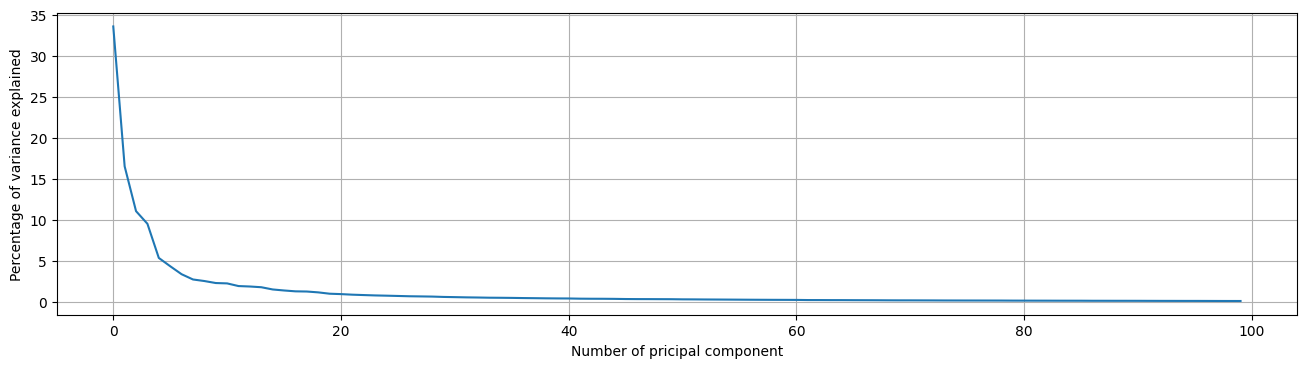

In [218]:
fig = plt.figure(figsize = (16,4), dpi = 100)
plt.plot(pca.explained_variance_)
plt.ylabel('Percentage of variance explained')
plt.xlabel('Number of pricipal component')
plt.grid(True)

(2063, 100)

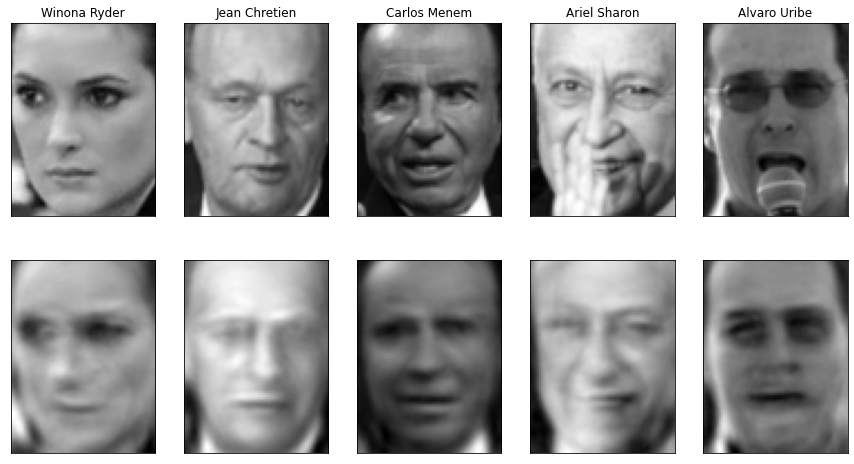

In [219]:
components = pca.transform(X_people.data)
projected = pca.inverse_transform(components)

#Plot original image in the upper row and construction using pca in the lower
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i in range(0,5):
    plt.subplot(2,5,i+1)
    plt.imshow(people.images[i], cmap="gray")
    plt.title(people.target_names[people.target[i]])
    plt.subplot(2,5,i+6)
    plt.imshow(projected[i].reshape(image_shape), cmap="gray")

components.shape

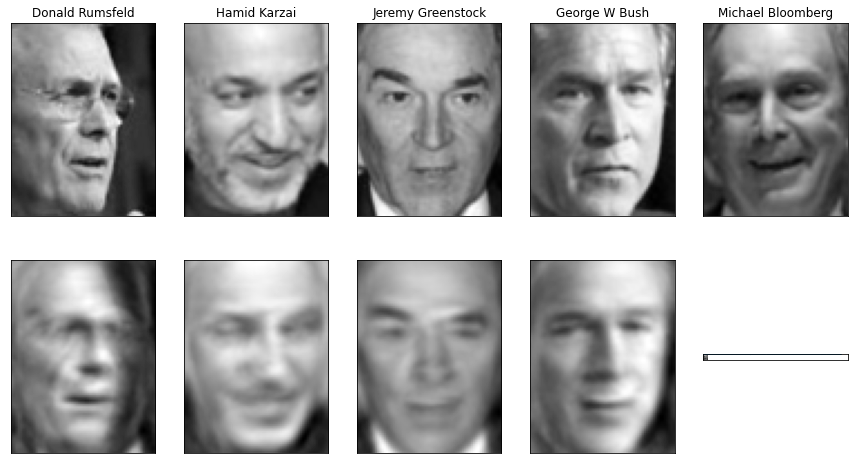

In [223]:
#We have noted that 4rth component varies a lot.
#Can we see significant difference between those where it is small and where it is large
i = 0
j = 100
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
while i < 5:
    #print('test1')
    if components[j,3] < -1:
        #print('test2')
        plt.subplot(2,5,i+1)
        plt.imshow(people.images[j], cmap="gray")
        plt.title(people.target_names[people.target[j]])
        plt.subplot(2,5,i+6)
        plt.imshow(projected[j].reshape(image_shape), cmap="gray")
        i = i+1
    j = j+1




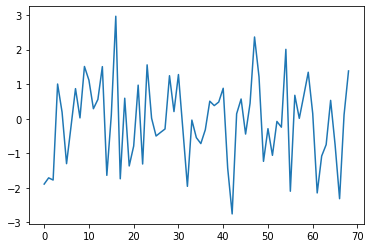

In [231]:
plt.plot(components[1:70:,3])